In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [3]:
airline = pd.read_csv(r"C:\dta\EastWestAirlines.csv")
airline.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,...,Qual_miles.1,cc1_miles.1,cc2_miles.1,cc3_miles.1,Bonus_miles.1,Bonus_trans.1,Flight_miles_12mo.1,Flight_trans_12.1,Days_since_enroll.1,Award?.1
0,1,28143,0,1,1,1,174,1,0,0,...,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,...,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,...,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,...,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,...,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airline.iloc[:,1:22])

In [6]:
Z = linkage(df_norm, method = 'ward')

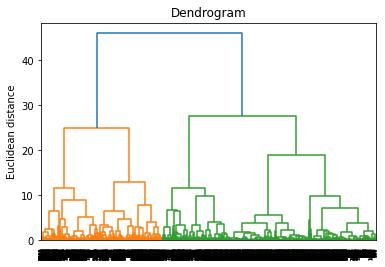

In [7]:
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [8]:
agg_clustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')


In [9]:
y_hc = agg_clustering.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [10]:
airline2=pd.concat([airline,Clusters],axis=1)

In [11]:
airline3 = pd.get_dummies(airline2, columns=['Clusters'])

In [12]:
airline3 = airline2.sort_values(by='Clusters')

In [13]:
airline3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,...,cc1_miles.1,cc2_miles.1,cc3_miles.1,Bonus_miles.1,Bonus_trans.1,Flight_miles_12mo.1,Flight_trans_12.1,Days_since_enroll.1,Award?.1,Clusters
1999,2016,327126,1452,5,1,1,97997,25,350,3,...,5,1,1,97997,25,350,3,4440,1,0
1250,1263,164884,0,4,1,1,35226,18,1734,2,...,4,1,1,35226,18,1734,2,5283,1,0
1247,1260,49288,0,3,1,1,12538,19,600,2,...,3,1,1,12538,19,600,2,5353,1,0
1245,1258,95207,0,3,1,1,30652,30,2348,8,...,3,1,1,30652,30,2348,8,5531,1,0
2990,3012,71263,0,5,1,1,80554,41,0,0,...,5,1,1,80554,41,0,0,2987,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,3138,16090,0,1,1,1,850,6,850,6,...,1,1,1,850,6,850,6,2592,0,4
3115,3137,7422,0,1,1,1,2229,3,0,0,...,1,1,1,2229,3,0,0,2653,0,4
3109,3131,43823,0,1,1,1,500,1,0,0,...,1,1,1,500,1,0,0,2717,0,4
3122,3144,29754,6396,1,1,1,500,1,0,0,...,1,1,1,500,1,0,0,2655,0,4


In [14]:
from sklearn.cluster import KMeans

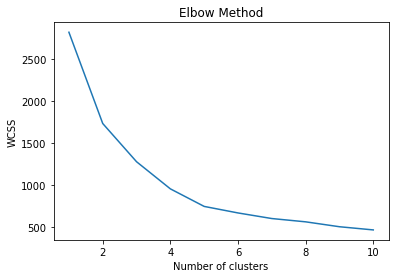

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [17]:
#Assign clusters to the data set
airline['clusterid_new'] = clusters_new.labels_

In [18]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,...,cc1_miles.1,cc2_miles.1,cc3_miles.1,Bonus_miles.1,Bonus_trans.1,Flight_miles_12mo.1,Flight_trans_12.1,Days_since_enroll.1,Award?.1,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,...,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,...,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,...,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,...,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,...,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,...,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,...,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,...,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,...,1,1,1,500,1,500,1,1401,0,0


In [19]:
clusters_new.cluster_centers_

array([[ 2.35903726e-02,  8.12712338e-03,  2.08998935e-02,
         9.05218317e-03,  1.06496273e-03,  1.23983757e-02,
         7.42316170e-02,  7.36183087e-03,  1.23977736e-02,
         4.31670456e-01,  3.16413562e-15,  5.72776692e-01,
         2.35903726e-02,  8.12712338e-03,  2.08998935e-02,
         9.05218317e-03,  1.06496273e-03,  1.23983757e-02,
         7.42316170e-02,  7.36183087e-03,  1.23977736e-02],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00,  4.73573071e-01,
         4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02],
       [ 6.87997738e-02,  7.06881279e-03,  6.32421875e-01,
         7.81250000e-04,  5.46875000e-03,  1.16223192e-01,
         2.00454215e-01,  7.28813439e-03,  1.20577830e

In [21]:
airline.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,...,Qual_miles.1,cc1_miles.1,cc2_miles.1,cc3_miles.1,Bonus_miles.1,Bonus_trans.1,Flight_miles_12mo.1,Flight_trans_12.1,Days_since_enroll.1,Award?.1
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2303.562300,40217.763578,90.601171,1.083600,1.018104,1.004260,3269.265708,6.383919,226.869542,...,90.601171,1.083600,1.018104,1.004260,3269.265708,6.383919,226.869542,0.657082,3582.274760,0
1,1,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,...,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1
2,2,1790.546875,117292.468750,78.803125,3.529688,1.001562,1.021875,30646.312500,17.239062,224.598437,...,78.803125,3.529688,1.001562,1.021875,30646.312500,17.239062,224.598437,0.639062,4520.140625,0
3,3,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,...,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1


In [22]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [23]:
neigh=NearestNeighbors(n_neighbors=7)
nbrs=neigh.fit(df_norm)
distances,indices=nbrs.kneighbors(df_norm)

NameError: name 'plot' is not defined

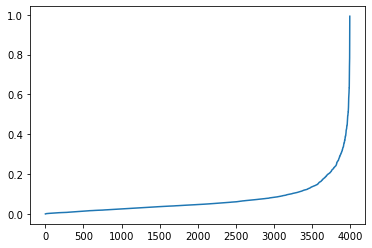

In [24]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)
plot.show()

In [25]:
dbscan = DBSCAN(eps=.25, min_samples=6)
dbscan.fit(df_norm)

DBSCAN(eps=0.25, min_samples=6)

In [26]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [27]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [28]:
pd.concat([airline,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,...,cc2_miles.1,cc3_miles.1,Bonus_miles.1,Bonus_trans.1,Flight_miles_12mo.1,Flight_trans_12.1,Days_since_enroll.1,Award?.1,clusterid_new,cluster
0,1,28143,0,1,1,1,174,1,0,0,...,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,...,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,...,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,...,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,...,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,...,1,1,8525,4,200,1,1403,1,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,...,1,1,981,5,0,0,1395,1,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,...,1,1,25447,8,0,0,1402,1,3,4
3997,4020,54899,0,1,1,1,500,1,500,1,...,1,1,500,1,500,1,1401,0,0,0
